In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [28]:
df.rename(columns= \
    {"parental level of education" : "parental_level_of_education", 
    "test preparation course": "test_preparation_course", 
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"}, inplace=True)
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [22]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
wm = df[(df.gender == "female") & (df['math_score'] >=df['math_score'].mean())]
wm.describe()

,math_score,reading_score,writing_score
count,221.000000,221.000000,221.000000
mean,77.425339,84.375566,84.429864
std,8.310458,8.401793,8.302837
min,67.000000,64.000000,66.000000
25%,71.000000,78.000000,78.000000
50%,76.000000,84.000000,84.000000
75%,82.000000,90.000000,91.000000
max,100.000000,100.000000,100.000000


In [30]:
df.loc[df.lunch == "free/reduced"].describe()

,math_score,reading_score,writing_score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [31]:
df.loc[df.lunch == "standard"].describe()

,math_score,reading_score,writing_score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [39]:
writing_score_query = 80
df.query("lunch == 'free/reduced' & writing_score > @writing_score_query").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
38,female,group D,associate's degree,free/reduced,completed,75,90,88
54,female,group C,some high school,free/reduced,completed,71,84,87
86,female,group C,some college,free/reduced,none,76,83,88
95,male,group C,associate's degree,free/reduced,completed,78,81,82
110,female,group D,associate's degree,free/reduced,completed,77,89,98


In [41]:
df.filter(like='score', axis=1)

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [43]:
df.groupby('gender').aggregate({'math_score': ['min', 'max'], 'reading_score': 'mean'})

math_score      reading_score
              min  max          mean
gender                              
female          0  100     72.608108
male           27  100     65.473029

Дота

In [52]:
dota = pd.read_csv('dota_hero_stats.csv')
dota.drop(columns='Unnamed: 0', inplace=True)
dota

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...
112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [84]:
dota.groupby('legs', as_index=True).aggregate({'legs':'count'})

,legs
legs,
0,11
2,95
4,7
6,3
8,1


In [82]:
dota.groupby(['attack_type', 'primary_attr']).agg({'id':'count'}).idxmax()

id    (Ranged, int)
dtype: object

In [71]:
acc = pd.read_csv("accountancy.csv", index_col="Unnamed: 0")
acc.groupby(['Type', 'Executor']).aggregate('mean').\
    sort_values(['Type', 'Salary'], ascending=[True,False]).\
    groupby(['Type']).head(1)

,,Salary
Type,Executor,
A,Pupa,160.833333
B,Loopa,145.166667
C,Loopa,154.333333
D,Pupa,146.500000
E,Loopa,164.000000
F,Loopa,238.000000


Чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus.

In [96]:
plants = pd.read_csv('algae.csv')
plants.groupby("genus").aggregate({"alanin":[ "min", "mean", "max"]}).round(2).loc[["Fucus"]]

alanin            
         min  mean   max
genus                   
Fucus   0.35  3.57  6.64

In [95]:
plants.query("genus == 'Fucus'").aggregate({"alanin":[ "min", "mean", "max"]}).round(2)

,alanin
min,0.35
mean,3.57
max,6.64


In [113]:
plants.groupby(["group"]).agg({"citrate" : "var", "glucose": lambda x: x.max() - x.min()}).round(2)

,citrate,glucose
group,,
brown,5.47,3.74
green,3.95,1.03
red,NaN,0.00


Число видов бурых, зелёных и красных водорослей
Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях
Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях

In [111]:
plants.groupby(["group"]).size()

group
brown    6
green    3
red      1
dtype: int64

In [112]:
plants.groupby(["group"]).agg(group_count = ('group', 'count'),
          citrate_var = ('citrate', 'var'),
          sucrose_range = ('sucrose', lambda x: x.max() - x.min())).round(2)

,group_count,citrate_var,sucrose_range
group,,,
brown,6,5.47,5.19
green,3,3.95,3.26
red,1,NaN,0.00


Попробовать разные способы построения графика

In [114]:
import seaborn as sns

In [119]:
income = pd.read_csv('income.csv')
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018-11-30 to 2019-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  5 non-null      int64
dtypes: int64(1)
memory usage: 80.0+ bytes


<AxesSubplot:>

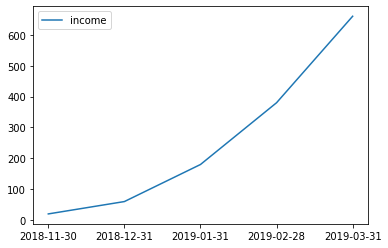

In [122]:
sns.lineplot(data=income)

Посчитать количество кластеров в данных

<AxesSubplot:xlabel='x', ylabel='y'>

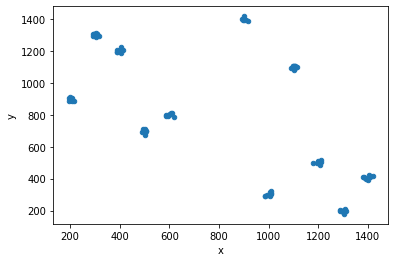

In [146]:
clasters = pd.read_csv('task.txt', sep=' ')
clasters.plot.scatter('x','y')

Построить тепловую карту

In [152]:
genome = pd.read_csv('genome_matrix.csv', index_col=0)

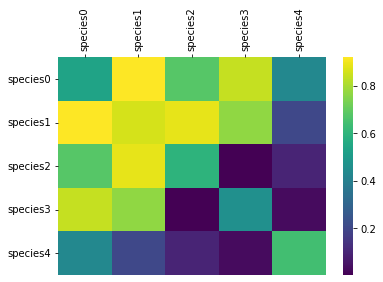

In [153]:
g = sns.heatmap(genome, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

 Посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [207]:
dota_stats = pd.read_csv('dota_hero_stats.csv', index_col=0)
dota_stats['number_of_roles'] = dota_stats.roles.str.count(',')+1
dota_stats

,attack_type,id,legs,localized_name,name,primary_attr,roles,number_of_roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4
...,...,...,...,...,...,...,...,...
112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']",4
113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']",4
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc...",6
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']",4


In [184]:
from ast import literal_eval
dota_stats = pd.read_csv('dota_hero_stats.csv', index_col=0, converters={'roles': literal_eval })

In [200]:
dota_stats['roles_count'] = dota_stats.roles.apply(lambda x : len(x))
dota_stats.roles_count.mode()

0    4
dtype: int64

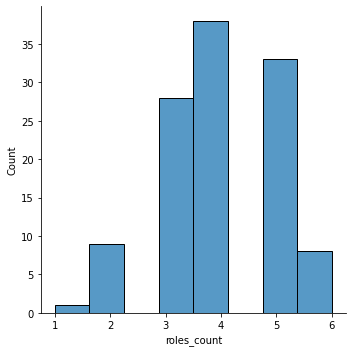

In [201]:
sns.displot(dota_stats['roles_count'])

,attack_type,id,legs,localized_name,name,primary_attr,roles,roles_count,number_of_roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"[Carry, Escape, Nuker]",3,NaN
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"[Initiator, Durable, Disabler, Jungler]",4,NaN
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"[Support, Disabler, Nuker, Durable]",4,NaN
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"[Carry, Disabler, Jungler, Nuker, Initiator]",5,NaN
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"[Support, Disabler, Nuker, Jungler]",4,NaN
...,...,...,...,...,...,...,...,...,...
112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"[Carry, Escape, Disabler, Initiator]",4,NaN
113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"[Support, Nuker, Disabler, Escape]",4,NaN
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"[Carry, Nuker, Disabler, Durable, Escape, Init...",6,NaN
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"[Support, Nuker, Disabler, Escape]",4,NaN


Построим распределения характеристик ирисов без разделения на виды

In [259]:
iris = pd.read_csv('iris.csv', index_col=0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal length', ylabel='Density'>

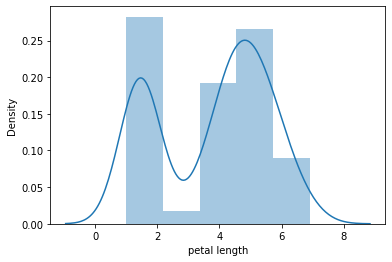

In [260]:
sns.distplot(iris['petal length'])

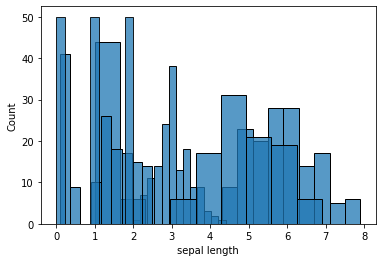

In [261]:
for column in iris.columns:
    sns.histplot(iris[column])

<AxesSubplot:ylabel='Count'>

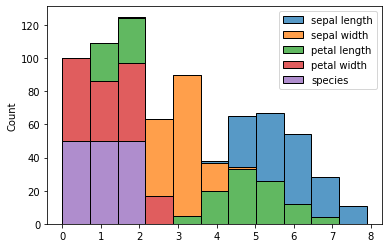

In [262]:
sns.histplot(iris,  multiple="stack")

Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal length'>

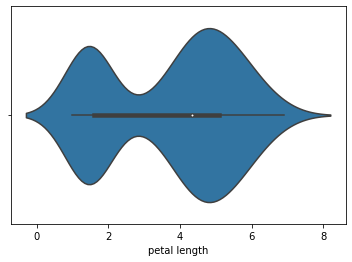

In [263]:
sns.violinplot(iris['petal length'])

Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных.

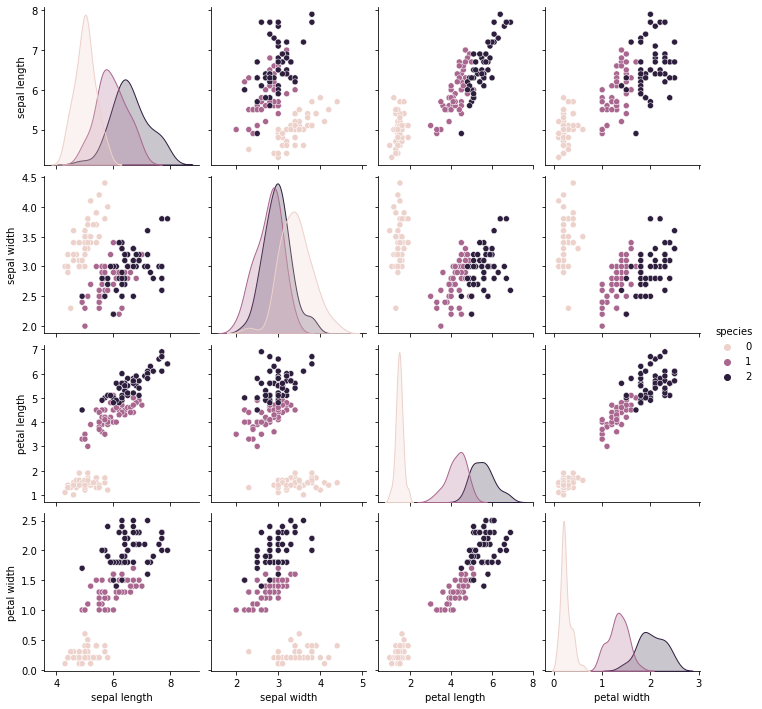

In [264]:
sns.pairplot(data=iris, hue='species')

<AxesSubplot:>

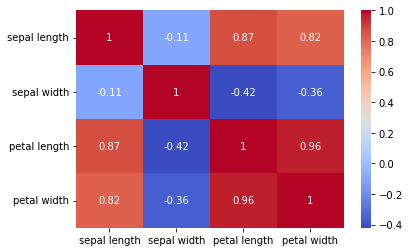

In [265]:
no_spc = iris.drop(columns='species')
sns.heatmap(no_spc.corr(), cmap='coolwarm', annot=True)

In [269]:
d = {'type': ['A','A','B','B'],'value': [10, 14,12,23]}
pd.DataFrame(data = d)


,type,value
0,A,10
1,A,14
2,B,12
3,B,23


Задание на отбор колонок и строк
В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

In [363]:
slct = pd.read_csv('my_stat.csv')
slct

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [356]:
subset_1 = slct.iloc[range(10), [0,2]]

In [357]:
rqr = slct.index.isin([0,4])
subset_2 = slct.loc[~rqr, ['V2', 'V4']]

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

In [358]:
# slct[(slct.V1 > 0)&(slct.V3 == 'A')]
subset_1 = slct.query("V1 > 0 & V3 == 'A'")
slct.query("V2 != 10 | V4 >= 1")

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [366]:
slct['V5'] = slct.V1 + slct.V4
slct['V6'] = slct['V2'].apply(lambda x : np.log(x))
slct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      500 non-null    int64  
 1   V2      500 non-null    float64
 2   V3      500 non-null    object 
 3   V4      500 non-null    float64
 4   V5      500 non-null    float64
 5   V6      500 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 23.6+ KB


В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

In [411]:
my_stat = slct.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'})

In [412]:
meadian = my_stat.loc[(my_stat.n_users >= 0)].n_users.median()
meadian

1.0

In [413]:
my_stat = my_stat.replace({'session_value' : {np.nan : 0 }})
meadian = my_stat.loc[(my_stat.n_users >= 0)].n_users.median()
my_stat.n_users = my_stat.n_users.apply(lambda x: meadian if x < 0 else x)

В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [420]:
mean_session_value_data = my_stat.groupby(by='group', as_index=False).agg({'session_value': 'mean'}).rename(columns={'session_value': 'mean_session_value'})

,group,mean_session_value
0,5.0,0.000000
1,7.0,0.333333
2,8.0,0.633333
3,9.0,0.238938
4,10.0,0.065990
5,11.0,-0.081081
6,12.0,-0.078947
7,13.0,0.000000
